# Homework 2, Problem 4

The goal of this problem is for you to try and classify whether or not an individual is likely to make more or less than 50K per year.  Carry out this task.  Try at least five machine algorithms, report precision, recall and f1 score on a test set.

For each of the parts, report your preformance in terms not of just numbers but in terms of graphs. When you have training and validation data, please show the curves as the training progresses. You should know when you are overfitting or underfitting. Don't just report bare numbers. **You are free to add implmentation or markdown cells to make your notebook clearer!!**

## Data:

The following dataset was taken from the first dataset repository: http://archive.ics.uci.edu/ml/datasets/Adult

As the original task of the dataset lays out, 
Please note:
* the continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents.

## Part 1: Dealing with Missing Values

What should you do about dealing with missing values - do you just drop those rows?

One of the most common problems we come accross in working with data "in the wild" is missing data. Often we will have observations (rows) that have only some of the needed attributes. Different rows will have different attributes missing. There are a number of strategies for dealing with the missing values. Clearly one could be dropping the column (attribute), or row (observation). Unfortuntely if you drop columns you may lose critical information that is helpful for classification and may be present in most (many) of the rows. You can drop rows but if many rows have at least one missing value, you may loose too much data. Do you try to impute (i. e. fill in) the missing data?  If so how?  

Explain why you chose the strategy you did.

*Hint - '?' denotes a missing value.*

### Some possible strategies for dealing with missing data

1. Whenever there is pleanty of data and very little missing data, you should consider dropping rows and/or columns. This may introduce some bias in the data but again, if the problem is limited to a very few rows or columns, it is easy in training to reproduce.

2. Fill with fixed value using sklearn.impute.SimpleImputer.
    a. 'constant' 0. Rarely a good idea but sometimes, if we can assume that when it is missing it is basically 0, this might be a good idea. For example a data may list number of house fires in a zip code and a missing value just means none.
    b. 'mean' if the data is numeric, the mean is meaningfull.
    c. 'median' may be more sensible if the data is integer or ordered. When the mean and median are very different it is important to understand what a "typical" example might mean. When considering "income", for example, a few large outliers will mess up the mean.
    d. "most_frequent' when you have categorical (nominal) labels, mean and median don't make any sense. Most probable label is what you need to use. This is also known as "mode".

3. sklearn.impute.MissingIndicator: Sometimes the fact that a value is missing, is itself an important indicator. One can create a new feature/attribute that indicates a certain attribute is missing. If you later build a classifier by hand you can explicitly wieght each variable using the missing variable weights so that for that example (row) that attribute won't contribute to the classifier. In a deep neural network it is possible that the network can learn to do that automatically.

4. One can use the sklearn.impute.KNNImputer which will look for rows to fill in the data.

5. Fill with sklearn.impute.IterativeImputer scikit-learn provides a sophisticated imputation strategy. You can read up on this in the documentation, but it will fix on of the columns (attributes), and try to use the other features to predict similar to KNN but more sophisticated.

6. Train a classifier: You can build your own classifier using machine learning. This is kind of a problem within a problem but if done correctly, it has the potential to be more accurate than a simpler method. Of course, if done badly it could be worse.

7. Manually impute the missing values. You may know enough about the problem to build an ad-hoc way to fill in the missing values for each column in a way that makes the most sense. This almost always requires a great deal of domain expertise. 



In [1]:
# Add your code for filling in the data here. Please end by using the appropriate method for data filling.
# to show the amount of missing data (which in the end should not be any since you dropped or filled in data)

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

columns = [
    "age",
    "work_class",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "target"
]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=columns)
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].str.strip()
df = df.dropna()

## Part 2: Train Test Validate Split

Ideally you will split the data and use the train data filling in proceedure for the test data. Because this is expensive you can do experiments initially to see if this matters. Just keep carefully in mind what you will know and what you can't know during the test evaluation. Both sklearn and tensorflow provide facilities for train test split. Take your pick.

At the end of this you should have a train, validate and test split. In the next part you are going to do preliminary testing of your model with your train+validation sets to get some idea of good canditates for hyperparameters. Later you will merge your training and validation set and resplit them up using cross validation to get better estimates for setting hyper-parameters

**NOTE: It is very important that you record very carefully any parameters you have for filling in data in step 1. For example if you you build a "fit" using some training data, later you will need to use the this "fit" to transform the data, you can not re-fit on new data. In other words if your "pipline" in training takes the mean of the input to fill in the first column, you need to fill with exactly that number, when you get new data for testing. Don't take the mean of the test data.**

In [2]:
df2 = df["target"]
df2 = pd.get_dummies(df2)
df2.head()

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
work_class        32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [4]:
X = df.drop([ columns[1],columns[3],columns[5],columns[6],columns[7],columns[8],columns[9], 
             columns[-2], columns[-1]], axis=1)
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [5]:
y = df2['>50K']
y = pd.DataFrame(y)
y.head()

,>50K
0,0
1,0
2,0
3,0
4,0


In [6]:
from sklearn.model_selection import train_test_split
import numpy.random as nr
nr.seed = 42

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=nr.seed)

## Part 3: Build different five different variations sklearn models and a Dummy

You will need to use a baseline classifier. Sklearn has sklearn.dummy.DummyClassifier which you can use as a benchmark for a braindead classifier. Pick 5 classifiers including simple ones like Knn or linear like logistic regression, and sophistocated ones like random forest and svm. Use the training and validation data from above (don't look at the testing data). Get a baseline for performance.

Create bar graphs using different metrics including accuracy, recall, precision and f1 score accross the different algorithms.

training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


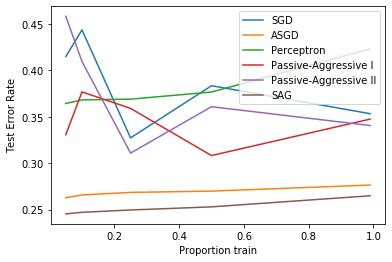

In [8]:
# Get baseline results here with logisic regression and random forest
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

# Set up your models here

def model_one():
    pass

def model_two():
    pass

def model_three():
    pass

def model_four():
    pass

def model_five():
    pass

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20

classifiers = [
    ("SGD", SGDClassifier(max_iter=100)),
    ("ASGD", SGDClassifier(average=True)),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0, tol=1e-4)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == np.array(y_test)))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

### Preliminary conclusions on your models

Include some graphs and peformance metrics

### It took about 20 minutes to train. It is clear that Logistic-Regression-SAG and Average Gradient Descent  are the best classifiers resulting in low Test Error, which is mostly constant regardless of the proportion chosen to train.

## Part 4: Cross-validation
We really should have used k-fold (eg. k=5) crossvalidation here, to not only evaluate our five keras/tensorflow models. See how your preliminary results change. Now that we have validation results with uncertainy (+- standard deviation), do your prior conclusion change. 

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
training ASGD
training SAG


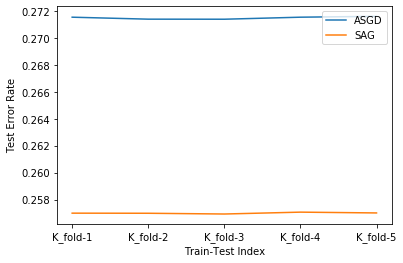

TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
training ASGD
training SAG


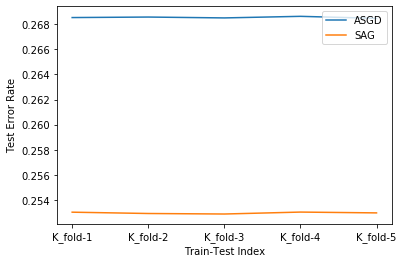

TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
training ASGD
training SAG


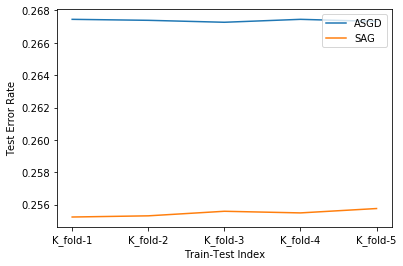

TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
training ASGD
training SAG


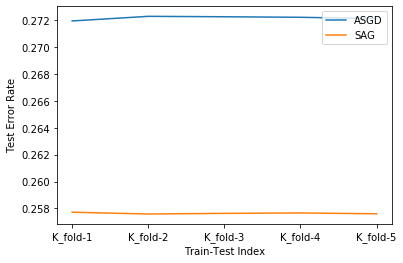

TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
training ASGD
training SAG


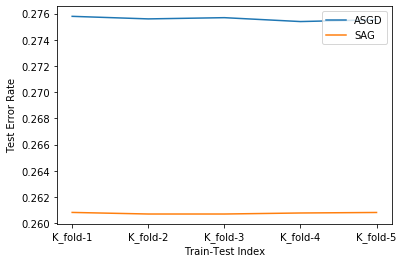

In [9]:
# Part 4 inplement cross validation here
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)

xx = ['K_fold-1','K_fold-2','K_fold-3','K_fold-4','K_fold-5']
rounds = 20
#count = 0
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = np.array(X)[np.array(train_index)], np.array(X)[np.array(test_index)]
     y_train, y_test = np.array(y)[np.array(train_index)], np.array(y)[np.array(test_index)]
        
     classifiers = [
     ("ASGD", SGDClassifier(average=True)),
     ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
     ]
     #count+=1

     for name, clf in classifiers:
         print("training %s" % name)
         rng = np.random.RandomState(42)
         yy = []
         for i in heldout:
             yy_ = []
             for r in range(rounds):
                 clf.fit(X_train, y_train)
                 y_pred = clf.predict(X_test)
                 yy_.append(1 - np.mean(y_pred == np.array(y_test)))
             yy.append(np.mean(yy_))
         plt.plot(xx, yy, label=name)

     plt.legend(loc="upper right")
     plt.xlabel("Train-Test Index")
     plt.ylabel("Test Error Rate")
     plt.show()

### Fill in your Part 4 Conclusion here 

Explain what you conclude on your models comparing preliminary results to those after cross-validation

#######################

## We can see that the model for Logistic-Regression-Sag and Average Gradient Descent is precise based on the Test Error Rate plots.  Furthermore, we can see that we are NOT overfitting.

## Part 5: Refining with Regularization

We know that our biggest problem, if our models are flexibile enough, will be overfitting. Please try to regularize your best 2 models to see if you can improve their results. Not all algorithms have regularization but analyze two that do. Make sure you show graph performance has you change the regularization parameters.
Look at these questions:

* Try regularizing each of your two best models, does the generalizability increase?  of Decrease?  
* Is one more sensitive than the other? Why might this happen and why?  
* Please try this with all of your features and then with the reduced set of features.  
* Report your precision, recall and f1 score on the train and validation sets (no cross validatio yet).  
* Next carry out cross validation.  Does regularization reduce under or overfitting?   Why or why not?  

** Hint: Try both L1 or L2 norm for regularization or dropout **


In [10]:
# Fill in your code analysis for part 5 here

#----
print('See above.')

See above.


### Fill in your part 5 conclusions here

Explain what you conclude from your regularization analysis.

## Regularization was used in the original analysis as additional classifiers. Regularization was used in Passive-Agressive I and II with C=1, and Logistic Regression -Sag with a C parameter.

## Overall Conclusion

Conclude with a full report here on what we know now about this problem. How well it does verses baseline, what the best Keras archtecture is, what features should be used, how the data should be cleaned etc.

# Without regularization, Average Gradient Descent was the best classifier on this cleaned data set (counting for numerical  entry). With AGSD the maximum error rate maxed out at ~25%. With various regularization models, the error rate decreased by a marginal 1 to 2%. AGSD achieved optimal results with minimal computation. Regularization can be more computationally or space expensive.